# Urlab's prophecy using fbprophet

An excuse to test facebook's prophet forecasting tool

https://facebookincubator.github.io/prophet/

In [16]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from sklearn.metrics import matthews_corrcoef
%matplotlib inline

## Prophet style

In [2]:
df = pd.read_csv('grosse_data.csv')
df = df.drop(["time.1"],axis=1)
df["is_open"] = df["is_open"].astype(int)
df["time"] = pd.to_datetime(df["time"])
df.columns = ["ds", "y"]

In [3]:
div = int(df.shape[0]*(0.93))
df_train = df.head(div)
df_test = df.tail(df.shape[0]-div)

## Prophet training

In [4]:
# Python
m = Prophet()
m.fit(df_train)

In [5]:
df_train.tail(3)

,ds,y
37164,2017-03-05 02:00:00,0
37165,2017-03-05 03:00:00,0
37166,2017-03-05 04:00:00,0


## Prophet prediction

In [6]:
df_test.iloc[-1].ds - df_test.iloc[0].ds

Timedelta('116 days 13:00:00')

In [7]:
future = m.make_future_dataframe(periods=166, freq = 'D')
future.head(1)

,ds
0,2012-12-07 14:00:00


In [8]:
forecast = m.predict(df[["ds"]])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

/Users/pierre/Workspace/urlab_opening/ve/lib/python2.7/site-packages/fbprophet/forecaster.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,yhat,yhat_lower,yhat_upper
0,2012-12-07 14:00:00,0.254388,-0.168741,0.692035
1,2012-12-07 15:00:00,0.254432,-0.146620,0.704465
2,2012-12-07 16:00:00,0.254476,-0.185175,0.688984
3,2012-12-07 17:00:00,0.254520,-0.149497,0.697319
4,2012-12-07 18:00:00,0.254564,-0.138158,0.660996


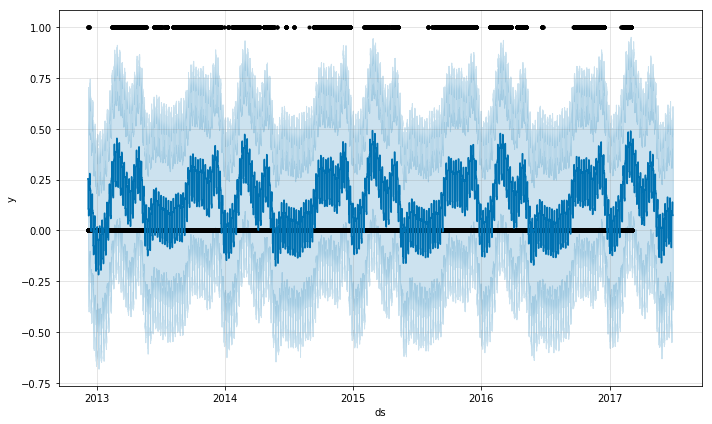

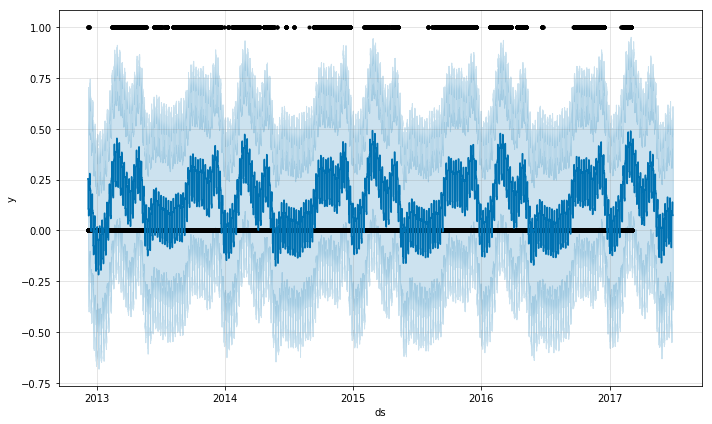

In [9]:
m.plot(forecast)

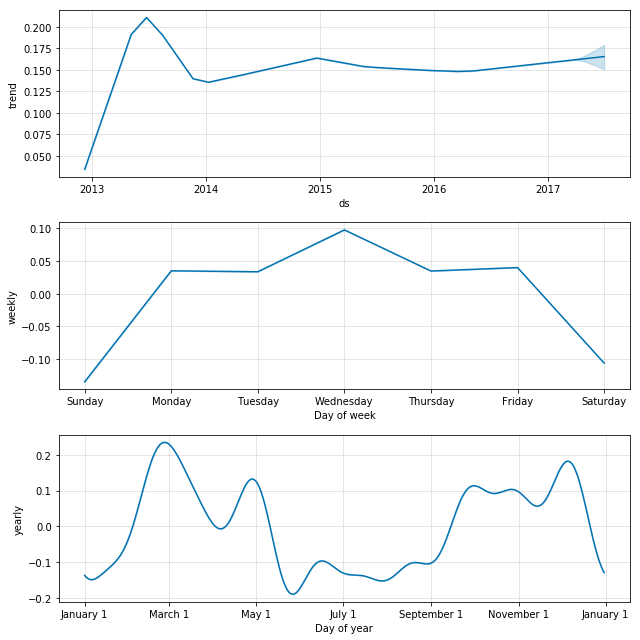

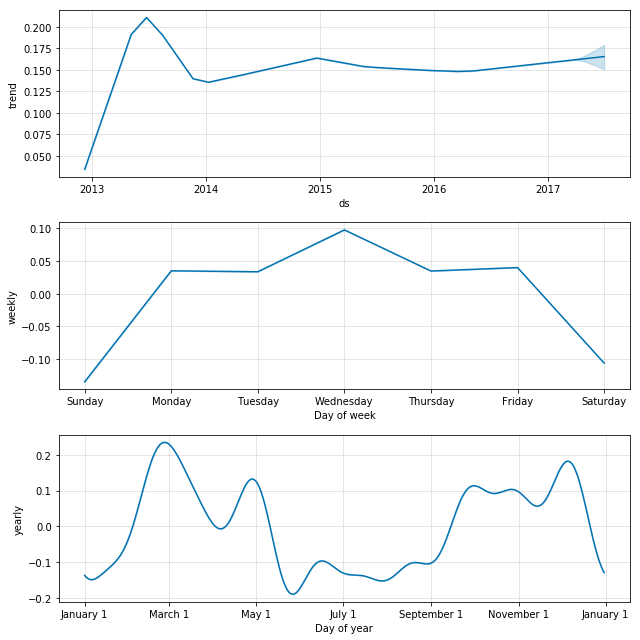

In [10]:
m.plot_components(forecast)

# Compare to reality

In [11]:
df_pred = forecast[forecast.ds > df_test.iloc[0].ds]

In [12]:
comparaison = df_pred.merge(df_test, on='ds')

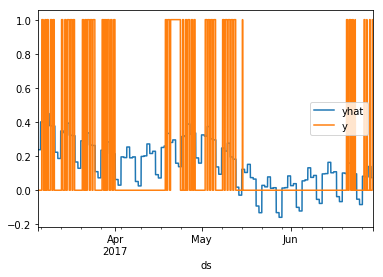

In [13]:
comparaison.plot(x="ds", y=["yhat","y"])

### Matthews

In [14]:
comparaisonbool = comparaison[["yhat","y"]]
comparaisonbool["yhat"] = comparaisonbool["yhat"].apply(lambda x : int(x>0.25)) # lololol je data science avec le cul
matthews_corrcoef(comparaisonbool.y, comparaisonbool.yhat)

/Users/pierre/Workspace/urlab_opening/ve/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.41629577002285467

### Precision

In [15]:
(comparaisonbool.yhat == comparaisonbool.y).astype(int).sum() / float(comparaisonbool.shape[0])

0.77404361816231682